In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [614]:
x = [0.5, 2.5]
y= [0.2, 0.9]

In [615]:
W1=np.random.rand(1,3)[0]

In [616]:
W1

array([0.00709413, 0.41798647, 0.0826472 ])

In [617]:
W2=np.random.rand(3,1).T[0]

In [618]:
W2

array([0.32140564, 0.54841786, 0.2940596 ])

In [619]:
b1=np.random.rand(1,3)[0]

In [620]:
b1

array([0.99662155, 0.95844174, 0.94633184])

In [621]:
b2=np.random.rand(1,1)[0]

In [622]:
b2

array([0.79788348])

In [623]:
A1=np.dot(x[0],W1)+b1

In [624]:
A1

array([1.00016861, 1.16743497, 0.98765544])

In [625]:
np.dot(sigmoid(A1),W2)

1.7731407025448054

In [626]:
sigmoid(1)

1.5819767068693265

In [627]:
def sigmoid(A):
    return (1/(1-np.exp(-A))) 

In [628]:
def forward_prop(W1,W2,b1,b2,X):
    A1=np.dot(X,W1)+b1
    Z1=sigmoid(A1)
    A2=np.dot(Z1,W2)+b2
    Z2=sigmoid(A2)
    return A1,Z1,A2,Z2   

In [629]:
def calc_se_loss(Z2,Y):
    return (Z2-Y)**2/2
    

In [630]:
def backprop(A1,Z1,A2,Z2,Y,W2,b2):
    deltafinal=(Z2[0]-Y)*Z2[0]*(1-Z2[0])
    deltabias=deltafinal*b2[0]*sigmoid(1)*(1-sigmoid(1))
    delta11=deltafinal*W2[0]*Z1[0]*(1-Z1[0])
    delta12=deltafinal*W2[1]*Z1[1]*(1-Z1[1])
    delta13=deltafinal*W2[2]*Z1[2]*(1-Z1[2])
    return deltafinal,delta11,delta12,delta13,deltabias

In [631]:
def initialize_grad(W1,W2,b1,b2):
    grad={}
    for i in range(len(W1)):
        grad['W1'+str(i)]=0
    for i in range(len(b1)):
        grad['b1' + str(i)]=0
    for i in range(len(W2)):
        grad['W2' + str(i)]=0
    for i in range(len(b2)):
        grad['b2'+ str(i)]=0
    return grad
    
    

In [632]:
def update_weights_using_adagrad(W1,W2,b1,b2,df,d11,d12,d13,db,grad,X,Z1):
    eta=0.1
    beta=0.95
    epsilon=0.01
    deltalayer1=[d11,d12,d13]
    for i in range(len(W1)):
        W1[i]-=eta*X*deltalayer1[i]/(math.sqrt(grad['W1'+str(i)]+epsilon))
        grad['W1'+str(i)]=beta*grad['W1'+str(i)]+(X*deltalayer1[i])**2
    for i in range(len(W2)):
        W2[i]-=eta*Z1[i]*df/(math.sqrt(grad['W2'+str(i)]+epsilon))
        grad['W2'+str(i)]=beta*grad['W2'+str(i)]+(Z1[i]*df)**2
    for i in range(len(b1)):
        b1[i]-=eta*deltalayer1[i]/(math.sqrt(grad['b1'+str(i)]+epsilon))
        grad['b1'+str(i)]=beta*grad['b1'+str(i)]+(deltalayer1[i])**2
    for i in range(len(b2)):
        b2[i]-=eta*df/(math.sqrt(grad['b2'+str(i)]+epsilon))
        grad['b2'+str(i)]=beta*grad['b2'+str(i)]+(df)**2

    return W1,W2,b1,b2
    
    
    

In [633]:
W1losssum=[0,0,0]
W2losssum=[0,0,0]
b1lossum=[0,0,0]
b2lossum=0
errors=[]
W1s=[]
W2s=[]
b1s=[]
b2s=[]
error=[]
grad=initialize_grad(W1,W2,b1,b2)
for j in range(50):
    error=[]
    for i in range(len(x)):
        A1,Z1,A2,Z2=forward_prop(W1,W2,b1,b2,x[i])
        error.append(calc_se_loss(Z2,y[0]))
        df,d11,d12,d13,db=backprop(A1,Z1,A2,Z2,y[i],W2,b2)
        W1,W2,b1,b2=update_weights_using_adagrad(W1,W2,b1,b2,df,d11,d12,d13,db,grad,x[i],Z1)
    W1s.append(W1.mean())
    W2s.append(W2.mean())
    b1s.append(b1.mean())
    b2s.append(b2.mean())
    error=np.array(error)
    errors.append(error.sum())



Text(0, 0.5, 'root mean square error')

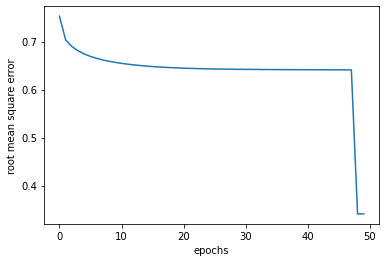

In [634]:
plt.plot(np.arange(len(errors)),errors)
plt.xlabel("epochs")
plt.ylabel("root mean square error")

In [635]:
from mpl_toolkits import mplot3d

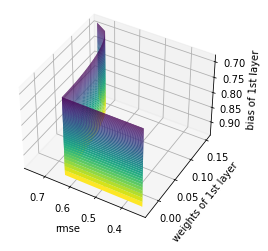

In [636]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W1s,b1s=np.meshgrid(W1s, b1s)
ax.plot_surface(errors,W1s,b1s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 1st layer")
ax.set_zlabel("bias of 1st layer")
ax.view_init(-140, 60)

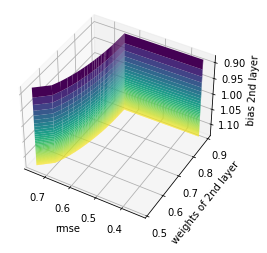

In [637]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W2s,b2s=np.meshgrid(W2s, b2s)
ax.plot_surface(errors,W2s,b2s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 2nd layer")
ax.set_zlabel("bias 2nd layer")
ax.view_init(-140, 60)